Preparing notebook

In [58]:
%load_ext autoreload
%autoreload 2

seed: int = 42
import numpy as np
import random
import mxnet
import pandas as pd

np.random.seed(seed)
random.seed(seed)

print(f"GPUs available {mxnet.context.num_gpus()}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GPUs available 1


Loading data for exploration. Some considerations:
* We are replacing missing values with linear interpolation.
* No resampling performed. It appears to be every two hours

In [59]:
import insight_lander

frequency: str = "2H"

timestamp_threshold: pd.Timestamp = pd.Timestamp(year=2019, month=4, day=1)
data_frame = insight_lander.get_dataset(frequency)
data_frame = data_frame[data_frame.index < timestamp_threshold]
data_frame.head(100)

Before interpolation: Missing values
martian_days                  0
solar_longitude               0
local_time                    0
assim_surface_pressure        0
assim_eastwind_speed          0
assim_northwind_speed         0
assim_dust_opticaldepth       0
assim_air_temperature         0
surface_pressure           1119
air_temperature            1807
eastward_wind_speed        1993
northward_wind_speed       1993
dtype: int64


,martian_days,solar_longitude,local_time,assim_surface_pressure,assim_eastwind_speed,assim_northwind_speed,assim_dust_opticaldepth,assim_air_temperature,surface_pressure,air_temperature,eastward_wind_speed,northward_wind_speed
2018-12-17 12:00:00,7261.083,307.968,9.0,754.965,-9.575,6.376,0.397,194.534,757.030,205.157,3.363000,4.349000
2018-12-17 14:00:00,7261.167,308.018,11.0,727.660,-9.070,4.206,0.397,198.137,743.842,226.743,3.562000,1.863000
2018-12-17 16:00:00,7261.250,308.068,13.0,716.942,-8.358,0.466,0.397,200.567,732.172,243.768,-4.139000,6.710000
2018-12-17 18:00:00,7261.333,308.119,15.0,715.132,-7.416,-2.551,0.397,197.131,721.586,248.897,4.757000,-4.860000
2018-12-17 20:00:00,7261.417,308.169,17.0,733.721,-3.493,-2.320,0.397,193.254,714.435,240.921,1.888000,-5.626000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25 10:00:00,7268.833,312.606,3.0,754.927,2.735,2.323,0.437,197.886,749.288,180.727,4.325333,-1.384333
2018-12-25 12:00:00,7268.917,312.656,5.0,758.308,0.736,2.201,0.437,194.456,750.093,178.508,3.555667,0.544333
2018-12-25 14:00:00,7269.000,312.706,7.0,759.110,2.590,4.622,0.437,192.049,756.644,175.885,2.786000,2.473000
2018-12-25 16:00:00,7269.083,312.755,9.0,750.480,-4.713,2.786,0.437,189.910,760.480,205.408,8.474000,1.502000


General data information

In [60]:
data_frame.describe()

,martian_days,solar_longitude,local_time,assim_surface_pressure,assim_eastwind_speed,assim_northwind_speed,assim_dust_opticaldepth,assim_air_temperature,surface_pressure,air_temperature,eastward_wind_speed,northward_wind_speed
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,7356.209829,236.331000,12.064593,734.052635,-0.003255,1.143075,0.504341,193.794178,728.591090,209.158107,1.679862,0.517455
std,88.603405,138.525683,6.850925,25.829643,3.668719,4.440305,0.325954,11.032999,23.385854,25.869793,3.873682,3.114562
min,7261.083000,0.034000,1.000000,668.361000,-14.162000,-12.075000,0.181000,166.894000,651.435000,171.242000,-11.921000,-9.243000
25%,7295.270750,74.913250,7.000000,719.558750,-2.290750,-2.023750,0.315000,186.743000,712.849713,185.732750,-0.929658,-1.721250
50%,7329.458500,317.651000,13.000000,735.069500,0.748500,1.346000,0.456000,193.559500,732.302000,202.996500,2.718500,0.419400
75%,7363.646000,341.905500,17.750000,749.211250,2.295250,3.949250,0.548000,201.364750,745.221500,235.446900,4.240250,2.783000
max,7603.167000,359.992000,23.000000,802.949000,11.670000,12.406000,2.210000,231.866000,781.515000,266.439000,11.537000,10.355000


Inspecting the time dimension, to explore time frequency

General dataframe information

In [61]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2018-12-17 12:00:00 to 2019-03-31 22:00:00
Freq: 2H
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   martian_days             1254 non-null   float64
 1   solar_longitude          1254 non-null   float64
 2   local_time               1254 non-null   float64
 3   assim_surface_pressure   1254 non-null   float64
 4   assim_eastwind_speed     1254 non-null   float64
 5   assim_northwind_speed    1254 non-null   float64
 6   assim_dust_opticaldepth  1254 non-null   float64
 7   assim_air_temperature    1254 non-null   float64
 8   surface_pressure         1254 non-null   float64
 9   air_temperature          1254 non-null   float64
 10  eastward_wind_speed      1254 non-null   float64
 11  northward_wind_speed     1254 non-null   float64
dtypes: float64(12)
memory usage: 127.4 KB


Counting NULL values

Querying the time range, to check for well-known dust storm events

In [62]:
print(f"Minimum value {data_frame.index.min()}")
print(f"Maximum value {data_frame.index.max()}")

Minimum value 2018-12-17 12:00:00
Maximum value 2019-03-31 22:00:00


**Question to Kylash:** Is there a well-know dust storm between 2018 and 2021?`

**Note** If global-scale dust storms are really infrequent, we definitely need more data.


Plotting the time series, looking for evidence of dust storms.

In [63]:
from typing import List

target_columns: List[str] = [
    "eastward_wind_speed",
    "northward_wind_speed",
    "surface_pressure",
    "air_temperature",
    "solar_longitude",
    "local_time",
    "assim_dust_opticaldepth"]


Plotting using observation time

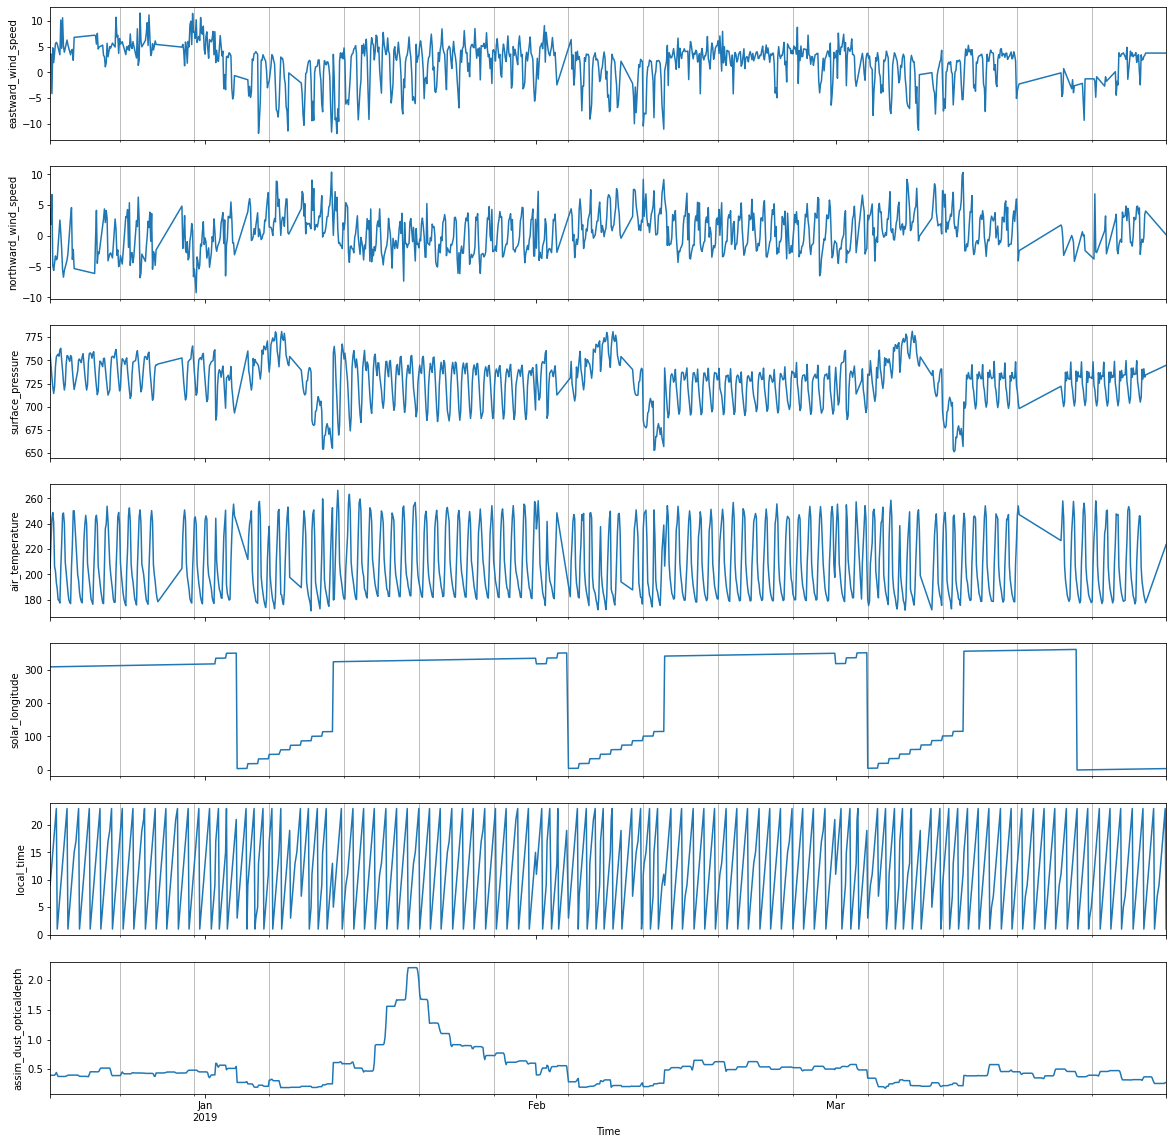

In [64]:
insight_lander.plot_time_series(dataframe=data_frame,
                                column_names=target_columns,
                                index_columns=[])

Now, we define our training and validation dataset. We will try to forecast 1-week values of CDOD

**TODO** Shall we better do this in MARS years?

<AxesSubplot:>

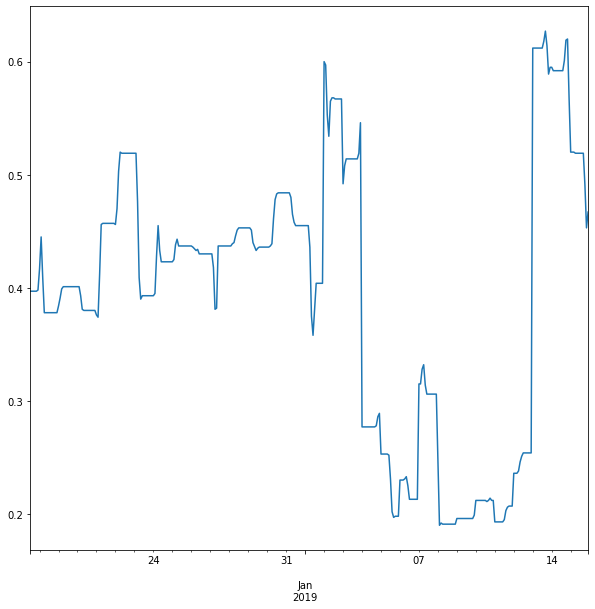

In [65]:
from gluonts.dataset.common import ListDataset
import pandas as pd

start_training: pd.Timestamp = pd.Timestamp(year=2018, month=12, day=15)
end_training: pd.Timestamp = pd.Timestamp(year=2019, month=1, day=16)

target_time_series: List[pd.Series] = [data_frame[target_column] for target_column in target_columns]
training_dataset: ListDataset
training_series, training_dataset = insight_lander.to_list_dataset(target_time_series,
                                                                   start_date=start_training,
                                                                   end_date=end_training,
                                                                   frequency=frequency)
# Only for visualization
training_series[-1]["target"].plot(figsize=(10, 10))

Let's start generating a single test time series

2018-12-17 12:00:00    0.397
2018-12-17 14:00:00    0.397
2018-12-17 16:00:00    0.397
2018-12-17 18:00:00    0.397
2018-12-17 20:00:00    0.397
                       ...  
2019-01-20 14:00:00    2.209
2019-01-20 16:00:00    2.209
2019-01-20 18:00:00    2.210
2019-01-20 20:00:00    2.204
2019-01-20 22:00:00    2.128
Freq: 2H, Name: assim_dust_opticaldepth, Length: 414, dtype: float64

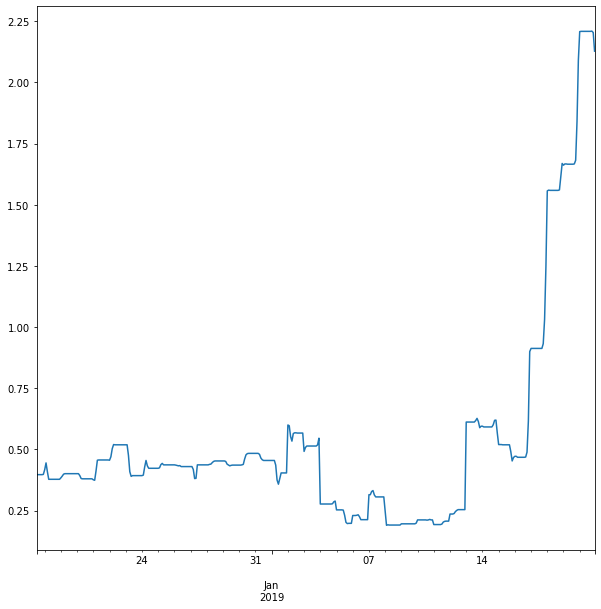

In [66]:
from datetime import timedelta

prediction_days: int = 5 # From Optuna: 6
end_testing: pd.Timestamp = end_training + timedelta(days=prediction_days)
testing_series, testing_dataset = insight_lander.to_list_dataset(target_time_series,
                                                                 start_date=start_training,
                                                                 end_date=end_testing,
                                                                 frequency=frequency)
testing_series[-1]["target"].plot(figsize=(10, 10))
testing_series[-1]["target"]

**Starting the training process**
From "Atmospheric Dust on Mars: A Review", temperature, pressure and winds matter too.

First, we look for good hyperparameter values


In [67]:
from optuna.trial import FrozenTrial
from gluonts.model.predictor import Predictor
import deepar_forecast

# AWS recommends setting the same value for context and prediction lengths
# https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html
prediction_length: int = prediction_days * 12
context_length: int = prediction_length

epochs: int = 100
learning_rate: float = 1e-3
num_batches_per_epoch: int = 100
evaluation_samples: int = 100
batch_size: int = 32

optimize_parameters: bool = False
if optimize_parameters:
    optimization_trials: int = 10
    metric_type: str = "RMSE"
    trial: FrozenTrial = insight_lander.optimise_parameters(number_of_trials=optimization_trials,
                                                            learning_rate=learning_rate,
                                                            num_batches_per_epoch=num_batches_per_epoch,
                                                            training_dataset=training_dataset,
                                                            frequency=frequency,
                                                            metric_type=metric_type)
else:
    print("Skipping parameter optimisation...")


Skipping parameter optimisation...


Now, we start training

In [68]:
context_length = 60  # From Optuna: 12
prediction_length = context_length  # From Optuna: 12
batch_size = 32  # From Optuna: 32

if optimize_parameters:
    context_length = trial.params["context_length"]
    prediction_length = trial.params["context_length"]
    batch_size = trial.params["batch_size"]

predictor: Predictor = deepar_forecast.train_predictor(training_dataset=training_dataset,
                                                       prediction_length=prediction_length,
                                                       context_length=context_length,
                                                       epochs=epochs,
                                                       learning_rate=learning_rate,
                                                       num_batches_per_epoch=num_batches_per_epoch,
                                                       frequency=frequency,
                                                       batch_size=batch_size)

100%|██████████| 100/100 [00:04<00:00, 20.43it/s, epoch=100/100, avg_epoch_loss=1.21]


Model saved at models/


**Checking performance on the testing dataset**

Note that the resulting model is global, meaning it can predict all of the time series we provided as input.
However, we are going to focus on performance over `assim_dust_opticaldepth`, for its potential with
respect to dust storms.

actual                       0
2018-12-17 12:00  0.397
2018-12-17 14:00  0.397
2018-12-17 16:00  0.397
2018-12-17 18:00  0.397
2018-12-17 20:00  0.397
...                 ...
2019-01-20 14:00  2.209
2019-01-20 16:00  2.209
2019-01-20 18:00  2.210
2019-01-20 20:00  2.204
2019-01-20 22:00  2.128

[414 rows x 1 columns]


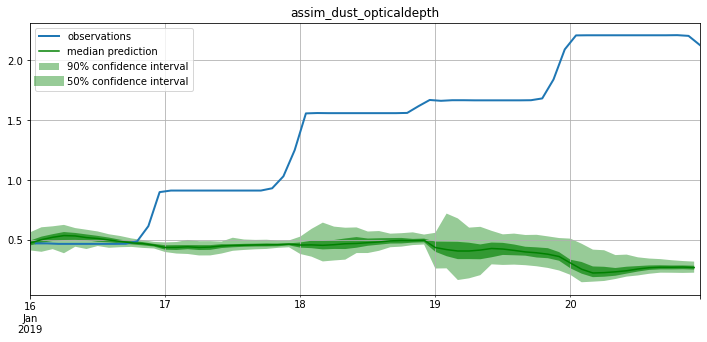

In [69]:
from deepar_forecast import plot_forecasts
from gluonts.model import Forecast
from typing import List
from gluonts.evaluation import make_evaluation_predictions

forecast_iterator, actual_iterator = make_evaluation_predictions(dataset=testing_dataset,
                                                                 predictor=predictor,
                                                                 num_samples=evaluation_samples)
forecast_list: List[Forecast] = list(forecast_iterator)
actual_list: List[pd.DataFrame] = list(actual_iterator)
plot_forecasts([actual_list[-1]], [forecast_list[-1]], past_length=context_length, plots=len(target_columns) + 1)

Checking training metrics

In [70]:
from gluonts.evaluation import Evaluator

evaluator: Evaluator = Evaluator(quantiles=[0.5])
aggregate_metrics, item_metrics = evaluator(iter(actual_list), iter(forecast_list))
aggregate_metrics

Running evaluation: 7it [00:00, 15.89it/s]
/home/cgc87/anaconda3/envs/deepar-gluton-ts/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  after removing the cwd from sys.path.


{'MSE': 546.8022708166214,
 'abs_error': 6012.798839569092,
 'abs_target_sum': 77266.96244049072,
 'abs_target_mean': 183.96895819164456,
 'seasonal_error': 9.430689828437673,
 'MASE': 3.309000590679451,
 'MAPE': 0.6557910067694527,
 'sMAPE': 0.574969454606374,
 'MSIS': 85.1847310819838,
 'QuantileLoss[0.5]': 6012.798966526985,
 'Coverage[0.5]': 0.3666666666666667,
 'RMSE': 23.383803600283283,
 'NRMSE': 0.1271073328355964,
 'ND': 0.07781849641365175,
 'wQuantileLoss[0.5]': 0.07781849805675883,
 'mean_absolute_QuantileLoss': 6012.798966526985,
 'mean_wQuantileLoss': 0.07781849805675883,
 'MAE_Coverage': 0.1333333333333333,
 'OWA': nan}

Checking individual metrics

In [71]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,ND,MSIS,QuantileLoss[0.5],Coverage[0.5]
0,eastward_wind_speed,15.694514,179.101990,256.487000,4.274783,2.900371,1.029190,0.981202,0.930959,0.698289,9.990740,179.102005,0.450000
1,northward_wind_speed,7.015188,129.678375,127.848007,2.130800,2.816349,0.767414,1.221126,1.458692,1.014317,7.312014,129.678363,0.716667
2,surface_pressure,1287.331901,1867.002197,43735.242188,728.920703,14.801391,2.102282,0.042704,0.043941,0.042689,9.453399,1867.002197,0.033333
3,air_temperature,394.444401,1012.883240,12766.948242,212.782471,16.752459,1.007696,0.075639,0.077653,0.079336,7.349256,1012.883224,0.500000
4,solar_longitude,2085.595313,2500.884033,19574.875000,326.247917,24.738932,1.684850,0.127664,0.138075,0.127760,22.693431,2500.884155,0.033333
5,local_time,36.150098,264.081116,722.000000,12.033333,3.941520,1.116663,1.543738,0.429580,0.365763,7.584039,264.081131,0.683333
6,assim_dust_opticaldepth,1.384481,59.167889,83.562004,1.392700,0.063807,15.454907,0.598464,0.945885,0.708072,531.910238,59.167890,0.150000


**Observations**
* For CDOD, using wind time series: 0.000122 MSE and 0.67 abs_error. On a second run, 0.000341 MSE and 1.306959 abs_error
* Including temperature and pressure: 0.000297 MSE and 1.010900 abs_error
* All features: 0.000385 MSE and 1.341332 abs_error.
* Wind and optimized parameters: 0.000099 MSE and 0.575846 abs_error